Fold 1 - Mean Squared Error: 286684814.94
Fold 2 - Mean Squared Error: 386254769.91
Fold 3 - Mean Squared Error: 180199357344.42
Fold 4 - Mean Squared Error: 275870305.79
Fold 5 - Mean Squared Error: 311926216.46

Average Mean Squared Error across 5 folds: 36292018690.31

Model Coefficients: [-9.33549410e-01  4.55917896e+02  2.67392369e+03 -3.65392395e-06
  1.68357285e+03 -9.20161571e+02 -4.55917896e+02  2.13219619e+04
  3.14222458e+03 -5.40916878e+03  1.86933804e+03  6.73459587e+03
  1.60309995e+04  2.12097779e+04  1.59806931e+04  6.08992580e+03
  4.39325542e+03 -5.42616756e+03]
Model Intercept: -914387.6860257979


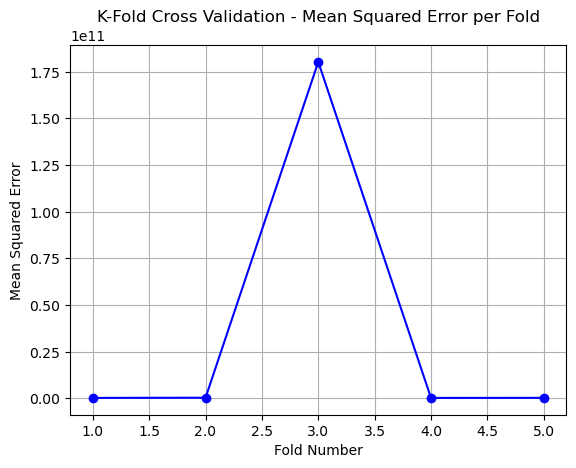

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your CSV file here
df = pd.read_csv("car_price_prediction.csv")  # change filename to your actual CSV name

# Clean numeric columns
df["Levy"] = pd.to_numeric(df["Levy"].replace("-", np.nan), errors="coerce")
df["Engine volume"] = pd.to_numeric(df["Engine volume"].astype(str).str.replace("[^0-9.]", "", regex=True), errors="coerce")
df["Mileage"] = pd.to_numeric(df["Mileage"].astype(str).str.replace(" km", "", regex=True), errors="coerce")
df["Cylinders"] = pd.to_numeric(df["Cylinders"], errors="coerce")
df["Airbags"] = pd.to_numeric(df["Airbags"], errors="coerce")
df["Prod. year"] = pd.to_numeric(df["Prod. year"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Add derived feature: car age
df["car_age"] = 2025 - df["Prod. year"]

# Select useful features (numeric + categorical)
features = [
    "Levy", "Engine volume", "Mileage", "Cylinders", "Airbags", "car_age",
    "Fuel type", "Gear box type", "Drive wheels"
]

# Keep only rows without missing Price
df = df.dropna(subset=["Price"])

# Fill missing numeric values
for col in ["Levy", "Engine volume", "Mileage", "Cylinders", "Airbags", "car_age"]:
    df[col] = df[col].fillna(df[col].median())

# Encode categorical columns (one-hot encoding)
df = pd.get_dummies(df, columns=["Fuel type", "Gear box type", "Drive wheels"], drop_first=True)

# Split features and target
X = df.drop(columns=["Price", "ID", "Manufacturer", "Model", "Category", "Leather interior", "Doors", "Wheel", "Color"], errors="ignore")
y = df["Price"]

# Initialize model and KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

mse_scores = []
fold = 1

# Perform K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    print(f"Fold {fold} - Mean Squared Error: {round(mse, 2)}")
    fold += 1

# Average MSE
avg_mse = np.mean(mse_scores)
print(f"\nAverage Mean Squared Error across 5 folds: {round(avg_mse, 2)}")

# Model summary
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Plot MSE per fold
plt.plot(range(1, 6), mse_scores, marker='o', color='blue')
plt.title("K-Fold Cross Validation - Mean Squared Error per Fold")
plt.xlabel("Fold Number")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()
